<a href="https://colab.research.google.com/github/PomesHouse/SkillTreePython-DataAnalysis/blob/main/03.%ED%86%B5%EA%B3%84%EA%B8%B0%EB%B0%98%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D/ch03_01_%ED%99%95%EB%A5%A0%EB%B3%80%EC%88%98%EC%99%80_%ED%99%95%EB%A5%A0%ED%95%A8%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch03.01. 확률 변수와 확률 함수
---
* 날짜:
* 이름:

## 학습내용
    - 실험 (Experiment) : 데이터셋을 생성하는 모든 프로세스 
    - 표본 공간 (Sample space): 실험에서 도출되는 모든 결과를 포함하는 공간
    - 사건 (Event) : 표본 공간 S의 부분집합
    - 확률 변수 (Random variable) : 표본공간의 모든 요소를 실수로 매핑하는 함수
    - 확률 함수 (Probability function) : 확률을 매핑하는 함수

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def get_font_family():
    
    # 시스템 환경에 따른 기본 폰트명을 반환하는 함수
    
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        ! apt-get install fonts-nanum -qq  > /dev/null
        ! fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic' 

#### **예제 01. 공정한 주사위**



* 확률변수가 '주사위를 굴려 나온 눈의 값' 일 때, 확률변수 $X$를 정의하세요.

In [ ]:
X = np.array([1,2,3,4,5,6]) # 벡터 = {}, ()

* 주사위의 모든 면이 '공정' 할 때, 확률 질량 함수 $P$를 정의하세요.

In [ ]:
def P(x): # 함수
    if 1 <= x <=6: return 1/6
    else: return 0
P_X = list(map(P, X))
print(P_X)

[0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]


* 확률 분포를 그리세요.

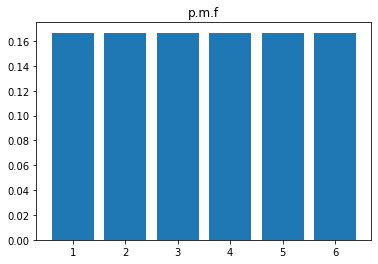

In [ ]:
plt.bar(X, P_X)
plt.title('p.m.f');

* 누적 확률 분포를 그리세요.

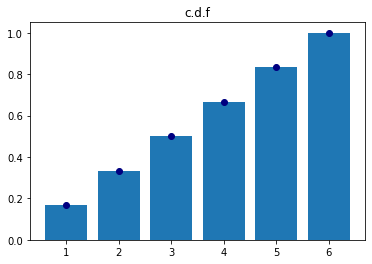

In [ ]:
F_X = np.cumsum(P_X)
plt.bar(X, F_X)
plt.title('c.d.f'); # 누적 밀도 함수 -> 연속형 분포 (여기선 연습삼아 그려보는 것)
# 누적 밀도 함수는 보통 선으로 그린다. 
plt.plot(X, F_X, 'o', color = 'navy') # 이산형이니 점으로

#### **예제 02. 동전 두번 던지기**


* 확률변수가 '앞면이 나온 횟수' 일 때, 확률변수 $X$를 정의하세요.

In [ ]:
X = np.array([0,1,2])

* 확률 질량 함수를 정의하세요.

In [ ]:
def P(x):
    if x == 1: return 1/2
    elif x == 2 or x == 0: return 1/4
    else: return 0
P_X = list(map(P,X))

* 확률 분포를 그리세요.

Text(0.5, 1.0, 'p.m.f')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


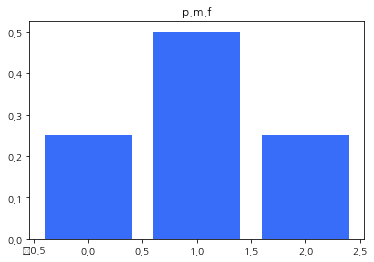

In [ ]:
plt.bar(X, P_X)
plt.title('p.m.f')

* 누적 확률 분포를 그리세요.

Text(0.5, 1.0, 'c.d.f')

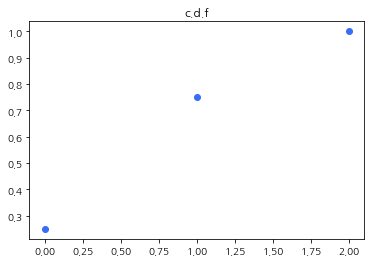

In [ ]:
F_X = np.cumsum(P_X)
plt.plot(X, F_X, 'o')
plt.title('c.d.f')

#### **예제 03. 화재 발생**


*  확률변수가 '1년간 발생한 화재건수' 일 때 $X$를 정의하세요.

In [ ]:
# N = 10으로 정의
X = np.array([i for i in range(11)])
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

* 화재발생 확률이 다음과 같이 주어졌을 때 함수 $f$ 를 정의하세요.

\begin{align}
f(X=x)=\frac{1}{2^{(x+1)}}
\end{align}

In [ ]:
def P(x):
    return 1/(2**(x + 1))
P_X = P(X) # np.array를 쓰면 브로드캐스팅 덕에 mapping을 할 필요가 없다. / list의 경우 mapping을 해주어야함. 
print(P_X)

[5.0000000e-01 2.5000000e-01 1.2500000e-01 6.2500000e-02 3.1250000e-02
 1.5625000e-02 7.8125000e-03 3.9062500e-03 1.9531250e-03 9.7656250e-04
 4.8828125e-04]


* 확률 분포를 그리세요.

Text(0.5, 1.0, '확률 분포(p.m.f)')

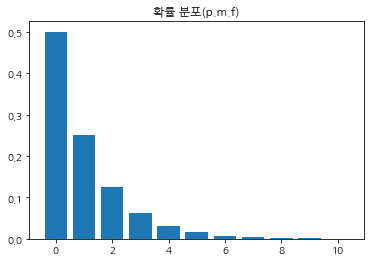

In [ ]:
plt.bar(X, P_X)
plt.title('확률 분포(p.m.f)')

* 누적 확률 분포를 그리세요.

Text(0.5, 1.0, '누적 확률 분포 (c.d.f)')

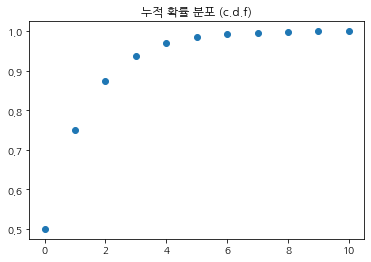

In [ ]:
F_X = np.cumsum(P_X)
plt.plot(X, F_X, 'o')
plt.title('누적 확률 분포 (c.d.f)')

#### **예제 04. 공정하지 않은 주사위**


* 확률변수가 '주사위를 굴려 나온 눈의 값' 일 때, 확률변수 $X$를 정의하세요.

In [ ]:
X = np.array([1, 2, 3, 4, 5, 6])

* 주사위의 짝수 면이 나올 확률이 홀수 면이 나올 확률의 2배일 때, 확률 질량 함수 $P$를 정의하세요.

In [ ]:
def P(x):
    if 1<= x <= 6:
        if x%2 == 0:
            return 2/9
        elif x%2 == 1:
            return 1/9
    else: return 0

P_X = list(map(P, X))
print(P_X)

[0.1111111111111111, 0.2222222222222222, 0.1111111111111111, 0.2222222222222222, 0.1111111111111111, 0.2222222222222222]


* 확률분포 를 그리세요.

Text(0.5, 1.0, 'p.m.f')

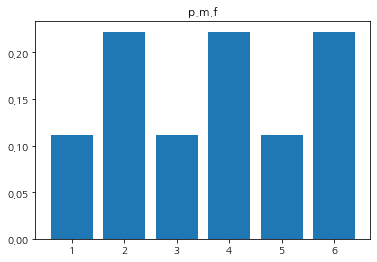

In [ ]:
plt.bar(X, P_X)
plt.title('p.m.f')

* 누적 확률 분포를 그리세요.

Text(0.5, 1.0, 'c.d.f')

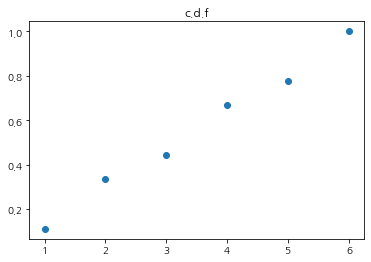

In [ ]:
F_X = np.cumsum(P_X)
plt.plot(X, F_X, 'o')
plt.title('c.d.f')

#### **예제 05. 주사위 두번 굴리기**


* 확률변수가 '주사위를 두번 굴려 나온 눈의 합' 일 때, 확률변수 $X$를 정의하세요.

In [ ]:
S = list()
for i in range(1,7):
    for j in range(1,7):
        S.append((i,j))
print(S)

X=set()
for s in S:
  X.add(sum(s))
X = list(X)
print(X)

[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)]
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


*  확률 질량 함수 $P$ 를 정의하세요.

In [ ]:
P=dict()
for s in S:
  if sum(s) in P: P[sum(s)]+=1/36
  else: P[sum(s)]=1/36
print(P)

{2: 0.027777777777777776, 3: 0.05555555555555555, 4: 0.08333333333333333, 5: 0.1111111111111111, 6: 0.1388888888888889, 7: 0.16666666666666669, 8: 0.1388888888888889, 9: 0.1111111111111111, 10: 0.08333333333333333, 11: 0.05555555555555555, 12: 0.027777777777777776}


In [ ]:
def P(x):
    if x  == 2 or x ==12:
        return 1/36
    if x == 3 or x == 11:
        return 2/36
    if x == 4 or x == 10:
        return 3/36
    if x == 5 or x == 9:
        return 4/36
    if x == 6 or x == 8:
        return 5/36
    if x == 7:
        return 6/36
    else: return 0

P_X = list(map(P, X))
print(P_X)

[0.027777777777777776, 0.05555555555555555, 0.08333333333333333, 0.1111111111111111, 0.1388888888888889, 0.16666666666666666, 0.1388888888888889, 0.1111111111111111, 0.08333333333333333, 0.05555555555555555, 0.027777777777777776]


* 확률 분포를 그리세요.

Text(0.5, 1.0, 'p.m.f')

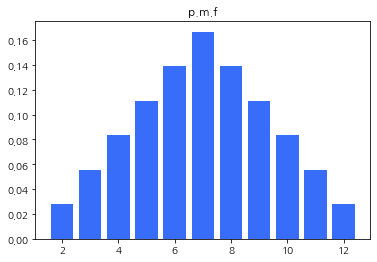

In [ ]:
_ = plt.bar(X, P_X)
plt.title('p.m.f')

* 누적 확률 분포를 그리세요.

Text(0.5, 1.0, 'c.d.f')

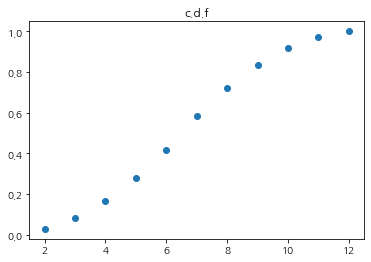

In [ ]:
F_X = np.cumsum(P_X)
plt.plot(X, F_X, 'o')
plt.title('c.d.f')

#### **예제 06. 손의 길이**


* 확률변수가 '성인의 손 길이(cm)' 입니다. $X$를 10부터 20까지 1000개의 값으로 정의하세요.

In [ ]:
X = np.linspace(10,20,1000)

* 손 길이에 대한 확률이 다음과 같이 주어졌을 때 함수 $f$ 를 정의하세요. ($\sigma$ = 1)



\begin{align}
 f(x)=\frac{1}{\sqrt{2\pi}\sigma}\exp^{-\frac{(x-15.2)^2}{2*\sigma^2}}
\end{align}

In [ ]:
def P(x, s= 1):
    return ( 1/(np.sqrt(2*np.pi)*s) ) * np.exp( -  (x-15.2)**2 / (2*(s**2)) )

P_X = P(X)

* 확률 분포를 그리세요.

Text(0.5, 1.0, 'p.d.f')

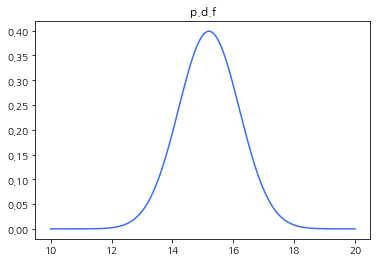

In [ ]:
plt.plot(X, P_X)
plt.title('p.d.f')

* 누적 확률 분포를 그리세요.

Text(0.5, 1.0, 'c.d.f')

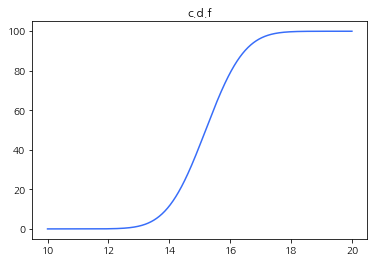

In [ ]:
F_X = np.cumsum(P_X)
plt.plot(X, F_X)
plt.title('c.d.f')

#### **예제 07. 파라미터 변경**

예제 06 에서 정의한 함수 $f$의 파라미터 $\sigma$를 각각 `0.5, 1, 2, 4`로 정의한 후 확률분포와 누적확률 분포를 그리세요.

\begin{align}
 f(x)=\frac{1}{\sqrt{2\pi}\sigma}\exp^{-\frac{(x-15.2)^2}{2*\sigma^2}}
\end{align}

In [ ]:
def P(x,s):
    return  ( 1/(np.sqrt(2*np.pi)*s) ) * np.exp( -  (x-15.2)**2 / (2*(s**2)) )

P_X1 = P(X,0.5)
P_X2 = P(X,1)
P_X3 = P(X,2)
P_X4 = P(X,4)

Text(0.5, 1.0, 'p.d.f')

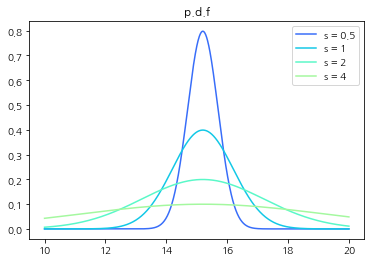

In [ ]:
import seaborn as sns
sns.set_palette('rainbow')
plt.plot(X, P_X1,  label = 's = 0.5')
plt.plot(X, P_X2,  label = 's = 1')
plt.plot(X, P_X3,  label = 's = 2')
plt.plot(X, P_X4,  label = 's = 4')
plt.legend()
plt.title('p.d.f')

Text(0.5, 1.0, 'c.d.f')

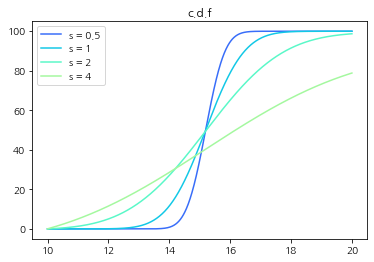

In [ ]:
F_X1 = np.cumsum(P_X1)
F_X2 = np.cumsum(P_X2)
F_X3 = np.cumsum(P_X3)
F_X4 = np.cumsum(P_X4)

plt.plot(X, F_X1, label = 's = 0.5')
plt.plot(X, F_X2, label = 's = 1')
plt.plot(X, F_X3, label = 's = 2')
plt.plot(X, F_X4, label = 's = 4')
plt.legend()
plt.title('c.d.f')

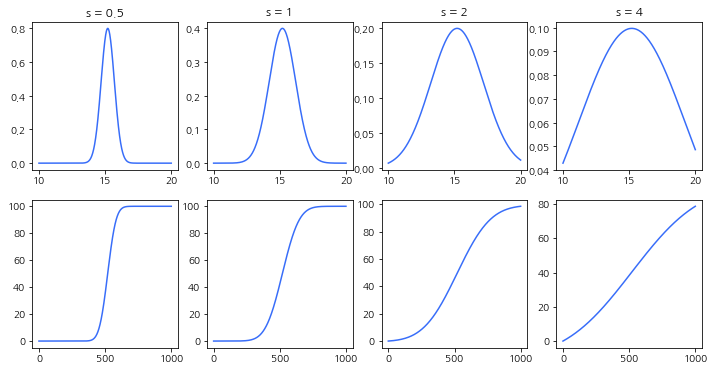

In [ ]:
# fig, axes = plt.subplots(2,4, figsize = (14, 8))
# axes = axes.flatten()
# for i,s in enumerate([0.5, 1, 2, 4]):
#     axes[i].plot(X, P(X,s))
#     axes[i].set_title(f's = {s}')
#     axes[i + 4].plot(X,np.cumsum(P(X,s)))

fig, axes = plt.subplots(2,4, figsize = (12, 6))

for i,s in enumerate([0.5, 1, 2, 4]):
    axes[0][i].plot(X, P(X,s))
    axes[0][i].set_title(f's = {s}')
    axes[1][i].plot(np.cumsum(P(X,s))) # X 안 넣어주어도 된다.